# Simulation of Feedback with Chaotic Dynamics from a Kawasaki Ising Model

In [111]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt
import os



## Initialization of Parameters

In [112]:

length = 100
random.seed(10)
times = 1
low_prob = 00
high_prob = 100 + 1
Beta = 1
K = -1 
num_chains = 2
spacing = 100
num_points = int(np.ceil((high_prob-low_prob)/spacing))
NeelState1 = dec2int(Fraction(1,3),length)
NeelState2 = dec2int(Fraction(2,3),length)

if K == 1:
    path = 'D:/Lab Research Results/Simulation Results/AntiFerromagnet/beta = ' + str(Beta) + '/'
else:
    path = 'D:/Lab Research Results/Simulation Results/Ferromagnet/beta = ' + str(Beta) +'/'
os.makedirs(path, exist_ok=True)


## Initialization of Order Parameter Arrays

In [113]:
if (length**2//2) % 10 == 0:
#record = np.zeros([high_prob-low_prob, 1], dtype=float)
    time_size = (length**2)//200+1 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([times, num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, time_size), dtype=float) #[probability, position, time]
    staggeredMagnetization = np.zeros((times, num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    totrecordlong = np.zeros((num_points, time_size))
    
else: 
    time_size = (length**2)//200+2 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([times, num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, time_size), dtype=float)
    staggeredMagnetization = np.zeros((times, num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    totrecordlong = np.zeros((num_points, time_size))


## Control + Kawasaki

In [114]:

for k in range(0, times):
    j = 0
    print(k)
    # Probability of choosing the Control Map
    for prob in range(low_prob, high_prob, spacing):
        #print(prob)
        #number1 = random.random()
        #number2 = random.random()
        #number3 = random.random()
        #number = tests[k]
        
        rep1 = random.getrandbits(length)
        rep2 = random.getrandbits(length)
        #rep3 = dec2int(number3, length)
        #print(k, rep, dec2int(Fraction(2, 3), length), dec2int(Fraction(1, 3), length))
        for i in range((length**2)//2):
            if (i%100)==0 and i != (length**2)//2:
                record1[j, i//100] += order_parameter(rep1, length)/times
                record2[j, i//100] += order_parameter(rep2, length)/times
                recordferro[k, j, i//100] = np.abs((length-bin(lattice[0]).count('1')-bin(lattice[1]).count('1'))/(length))
                #record3[j] += order_parameter(rep3, length)/times
                #for y in range(length):
                #    for x in range(num_chains):
                #        staggeredMagnetization[k, j, i//100] += (-1)**(x+y+((lattice[x]&(1<<y))>>y))/(2*length)
                staggeredMagnetization[k,j,i//100]=((bin(rep1^NeelState1).count('1')+bin(rep2^NeelState2).count('1'))-length)/length
                recordlong[j, i//100] = (2*bin(rep1^rep2).count('1')-length)/length
            if random.random() > (float(prob) / 100):
                rep1 = bernoulli(rep1, length)
            else:
                rep1 = control(rep1, length)
            if random.random() > (float(prob)/100):
                rep2 = bernoulli(rep2, length)
            else:
                rep2 = control(rep2, length)
            #if random.random() > (float(prob)/100):
            #    rep3 = bernoulli(rep3, length)
            #else:
            #    rep3 = control(rep3, length)
            

            # Initializing Ising Array for Monte Carlo Simulation
            lattice = [rep1, rep2]
                       #format(rep3, '0'+str(length)+'b')]
            for repeat in range(1):
                for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                    for x_pos in range(0, num_chains):
                        E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        old = lattice[x_pos]
                        # noinspection PyTypeChecker
                        lattice[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                        E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        if random.random() <= boltzmann_probability(E_i, E_f, Beta):
                            pass
                        else:
                            lattice[x_pos] = old
            

            
            rep1 = lattice[0]
            rep2 = lattice[1]
            #rep3 = int(lattice[2], base=2)
        #record[j] += (order_parameter(rep1, length)+order_parameter(rep2,length)+order_parameter(rep3, length))/(3*times) # can get rid of. just average the other three records in a plot
        record1[j, -1] += order_parameter(rep1, length)/times
        record2[j, -1] += order_parameter(rep2, length)/times
        recordferro[k, j, -1] += (length-bin(lattice[0]).count('1')-bin(lattice[1]).count('1'))/(length)
        recordferro = np.abs(recordferro)
        #record3[j] += order_parameter(rep3, length)/times
        #for y in range(length):
        #    for x in range(num_chains):
        #        staggeredMagnetization[k, j, -1] += (-1)**(x+y+((lattice[x]&(1<<y))>>y))/(2*length)
        staggeredMagnetization[k, j, -1] =((bin(rep1^NeelState1).count('1')+bin(rep2^NeelState2).count('1'))-length)/length
        staggeredMagnetization = np.abs(staggeredMagnetization) # accounts for changes of sign between iterations
        recordlong[j, -1] += (2*bin(rep1^rep2).count('1')-length)/length/times

        #totrecordlong = (np.sum(recordlong, axis=1)/(length))
        j += 1
        #print(j, number, rep, record[j])
        


0


In [115]:

#print( record1/3,  record2/3 , np.ndarray(np.sum(recordlong, axis=1)/(length*3)))
for i in range(num_points):
    for tau in range(time_size):
        totalparam[i, tau] = record1[i, tau]/3+record2[i, tau]/3 + recordlong[i,tau]/3
        

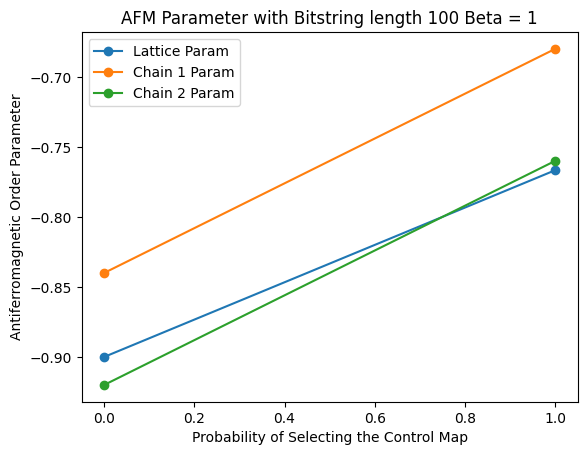

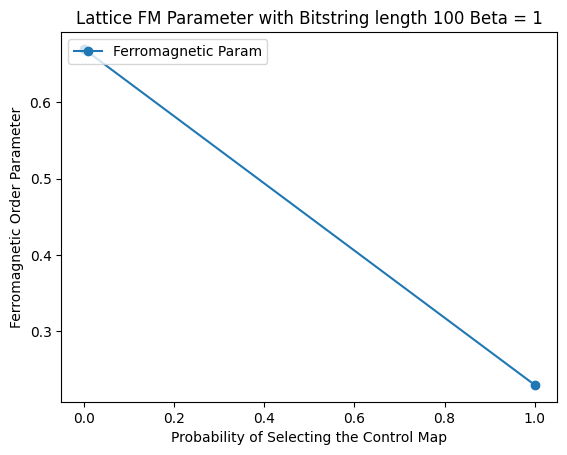

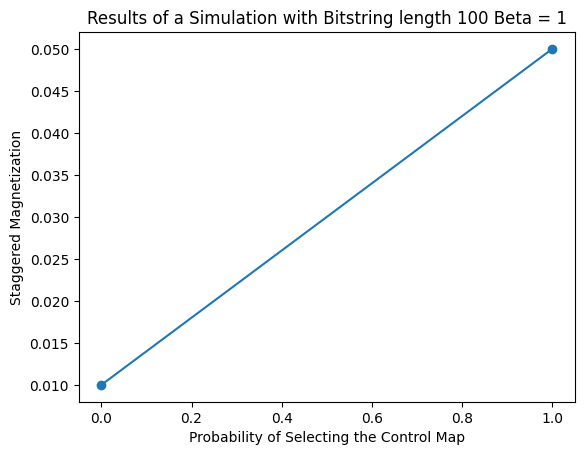

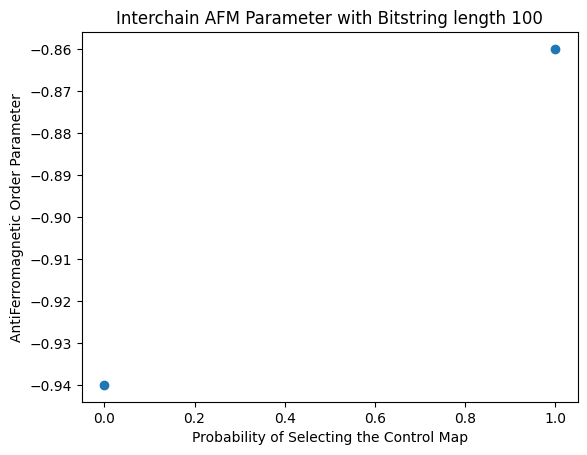

0000111111111100100000001000001111100000111111111111110111111111111110011111111111111100000010000000 0000111111111100000001000000011111100100111111111111111111111111111110011111111111111100000000000000
0.05 -0.76


In [116]:
plt.rcParams.update({
    "text.usetex": False,
})
#print(record[99])

fig, ax = plt.subplots() # results at end of simulation
ax.plot( np.linspace(0,1,num_points), totalparam[:,-1], marker='o', label="Lattice Param")

ax.plot( np.linspace(0,1,num_points), record1[:,-1], marker='o', label= "Chain 1 Param")
ax.plot( np.linspace(0,1,num_points), record2[:,-1], marker='o', label= "Chain 2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
fig.savefig(path+'AFM Param Length = ' + str(length) +'.png')

fig, ax = plt.subplots() # results at end of simulation
ax.plot( np.linspace(0,1,num_points), np.average(recordferro, axis=0)[:,-1], marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
fig.savefig(path+'FM Param Length = ' + str(length) +'.png')

fig, ax = plt.subplots() # results at end of simulation
ax.plot(np.linspace(0,1,num_points), np.average(staggeredMagnetization, axis = 0)[:,-1], marker='o', label = "Staggered Magnetization")
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))
fig.savefig(path+'Staggered Magnetization Length = ' + str(length) +'.png')

fig, ax = plt.subplots()
ax.scatter( np.linspace(0,1,num_points), recordlong[:, -1], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'AntiFerromagnetic Order Parameter')
ax.set_title(r'Interchain AFM Parameter with Bitstring length '+str(length))
fig.savefig(path+'Interchain AFM Param Length = ' + str(length) +'.png')

#fig.save("200 Length BitString, Full Probability Spectrum")
#plt.show()
#fig, ax = plt.subplots()
#ax.plot( np.linspace(.3,.6,30), record1[30:60], marker='o')
#ax.set_xlabel(r'Probability of Selecting the Control Map')
#ax.set_ylabel(r'$ <\hat{O}>$')
#ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
plt.show()
print(bin(lattice[0])[2:].zfill(length),bin(lattice[1])[2:].zfill(length))
#print(int(lattice[0], base = 2)-int(lattice[1], base = 2))
print(staggeredMagnetization[-1,-1,-1],  record2[-1,-1])

In [117]:
print(staggeredMagnetization[:,-1,-1])

[0.05]


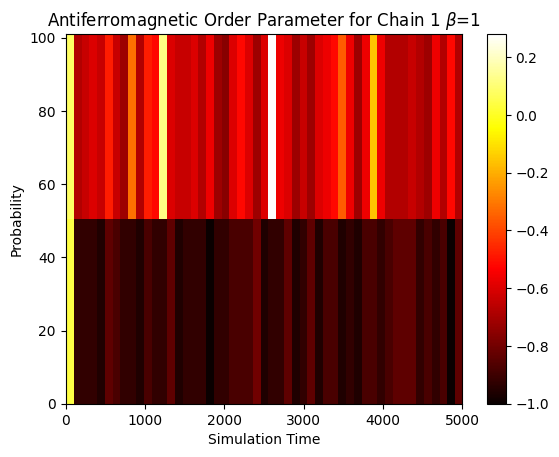

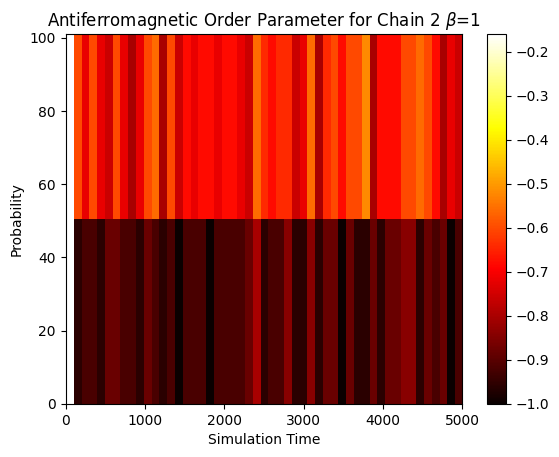

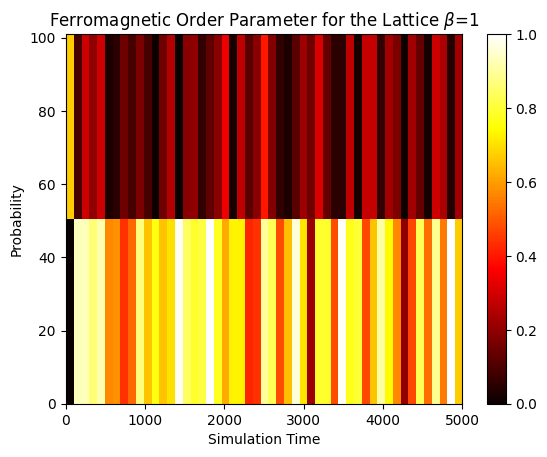

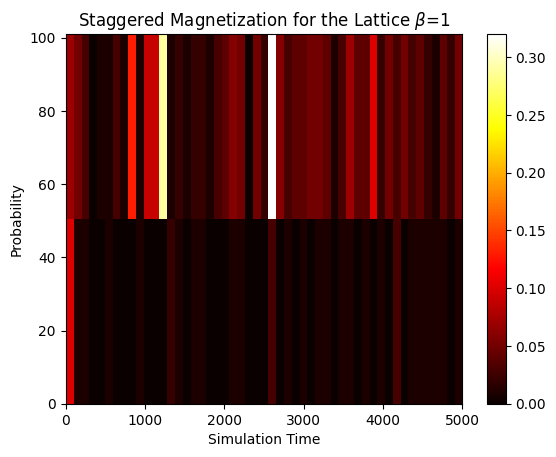

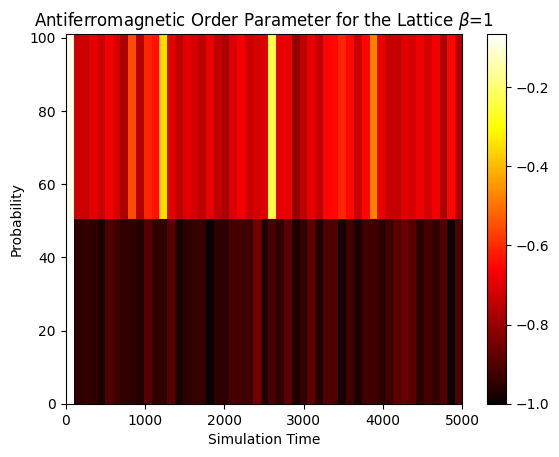

In [118]:

fig,ax = plt.subplots()
rec1=ax.imshow(record1, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(record1), vmax=np.max(record1), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for Chain 1 $\beta$=' + str(Beta))
fig.savefig(path+'AFM Param Heatmap Chain 1 Length = ' + str(length) +'.png')

fig,ax = plt.subplots()
rec1=ax.imshow(record2, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(record2), vmax=np.max(record2), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for Chain 2 $\beta$=' + str(Beta))
fig.savefig(path+'AFM Param Heatmap Chain 2 Length = ' + str(length) +'.png')


fig,ax = plt.subplots()
rec1=ax.imshow(np.average(recordferro, axis=0), cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(recordferro, axis=0)), vmax=np.max(np.average(recordferro, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Ferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))
fig.savefig(path+'FM Param Heatmap Length = ' + str(length) +'.png')


fig,ax = plt.subplots()
rec1=ax.imshow( np.average(staggeredMagnetization, axis=0), cmap='hot', interpolation='nearest', origin='lower',extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(np.average(staggeredMagnetization, axis=0)), vmax=np.max(np.average(staggeredMagnetization, axis=0)), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Staggered Magnetization for the Lattice $\beta$=' + str(Beta))
fig.savefig(path+'Staggered Magnetization Heatmap Length = ' + str(length) +'.png')


fig,ax = plt.subplots()
rec1=ax.imshow(totalparam,cmap = 'hot',interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(totalparam), vmax=np.max(totalparam), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))
fig.savefig(path+'AFM Param Heatmap Lattice Length = ' + str(length) +'.png')


Text(0.5, 1.0, 'Interchain AFM Parameter with Bitstring length 100')

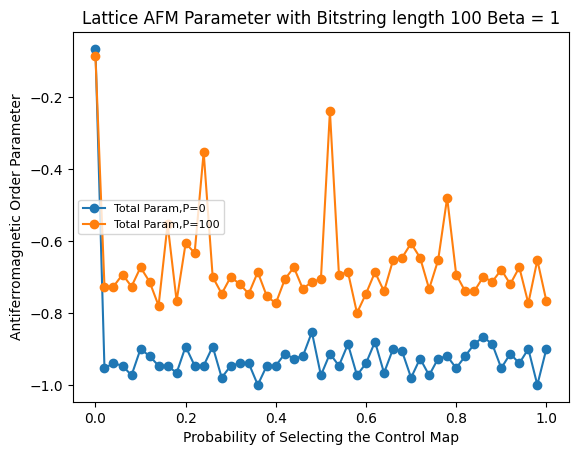

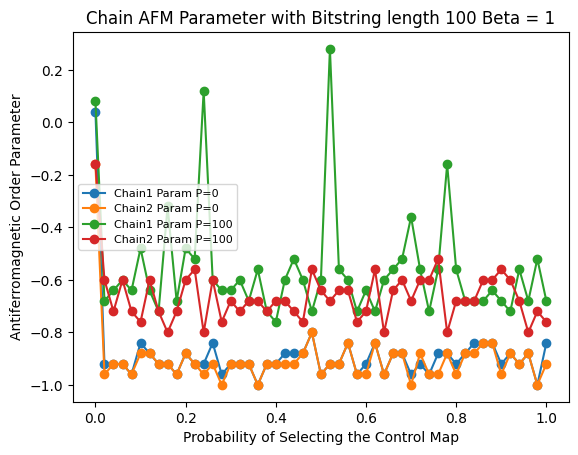

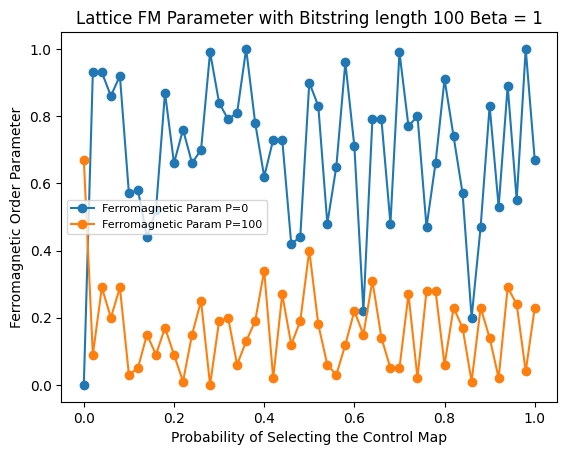

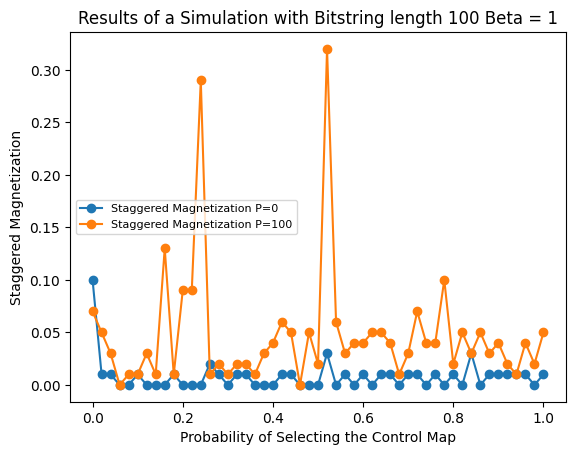

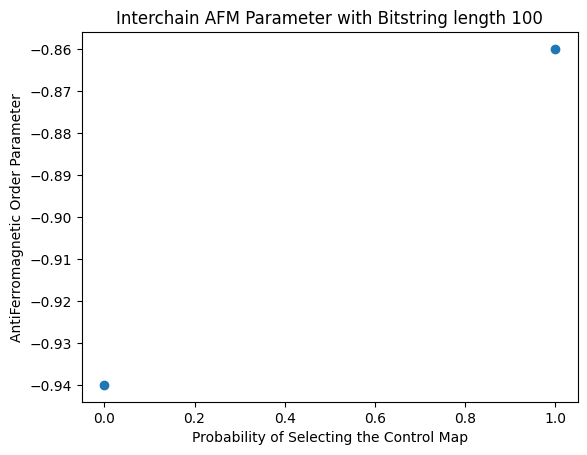

In [119]:
fig, ax = plt.subplots() 
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), totalparam[i,:], marker='o', label="Total Param,P=" +str(i*spacing) )
    if i%5 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Antiferromagnetic Order Parameter')
        ax.set_title(r'Lattice AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'Lattice AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), record1[i,:], marker='o', label= "Chain1 Param P=" +str(i*spacing))
    ax.plot( np.linspace(0,1,time_size), record2[i,:], marker='o', label= "Chain2 Param P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Antiferromagnetic Order Parameter')
        ax.set_title(r'Chain AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'Chain AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))


fig, ax = plt.subplots()
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), np.average(recordferro, axis=0)[i,:], marker='o', label= "Ferromagnetic Param P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Ferromagnetic Order Parameter')
        ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,1, time_size), np.average(staggeredMagnetization, axis=0)[i,:], marker='o', label = "Staggered Magnetization P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Staggered Magnetization')
        ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
ax.scatter( np.linspace(0,1,num_points), recordlong[:, -1], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'AntiFerromagnetic Order Parameter')
ax.set_title(r'Interchain AFM Parameter with Bitstring length '+str(length))

In [120]:
print(totalparam[:,0])

[-0.06666667 -0.08666667]
